<a href="https://colab.research.google.com/github/Adrianopogianeli/deep_learning_with_pyhon_sencond_edition/blob/master/chapter_2_data_representations_for_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#2.2.1 Scalars: (rank-0 tensors)
import numpy as np
x = np.array(12)
x


array(12)

In [2]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 0
number of dimension: ()


In [3]:
#2.2.2 Vectors: (rank-1 tensors)
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 1
number of dimension: (5,)


In [5]:
#2.2.3 Matrices (rank-2 tensors) it is 2 axes: rows and lines
x = np.array([[5,23,22,1,5],
             [6,34,1,7,89],
             [7,23,43,76,32]])
x

array([[ 5, 23, 22,  1,  5],
       [ 6, 34,  1,  7, 89],
       [ 7, 23, 43, 76, 32]])

In [6]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 2
number of dimension: (3, 5)


In [7]:
#2.2.4 Rank-3 and higher-rank tensors = it is a matrices's pack, it is 3 axes because is has 3 matrices
x = np.array([
    [[5,23,22,1,5],
      [6,34,1,7,89],
      [7,23,43,76,32]],
          [[5,23,22,1,5],
          [6,34,1,7,89],
          [7,23,43,76,32]],
             [[5,23,22,1,5],
             [6,34,1,7,89],
             [7,23,43,76,32]]
             ]
             )

In [8]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 3
number of dimension: (3, 3, 5)


In [9]:
#2.2.5 Key attributes
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
#it is 3 axes because it has more than 2 matrices (rank2)
train_images.ndim

3

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images.dtype

dtype('uint8')

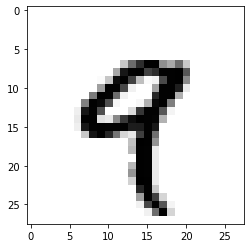

In [13]:
# Listing 2.8 Dispaly the fourth digit of the tensor rank3
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
## print all digits of the dataset
import time
#for item in range(len(train_images)):
  #plt.imshow(train_images[item], cmap=plt.cm.binary)
  #plt.show()
  #time.sleep(2)

In [15]:
train_labels[4]

9

In [16]:
#2.2.6 Manipulation tensors in Numpy
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [17]:
my_slice = train_images[10:100, :,:]
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [19]:
#select 14x14 pixes on bottom-rigth
my_slice = train_images[:,0:14,0:14]
my_slice.shape

(60000, 14, 14)

In [20]:
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

In [21]:
#2.2.7 The notion of data batches
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [22]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [23]:
n =3
batch = train_images[128 * n: 128 * (n+1)]
batch.shape

(128, 28, 28)

In [29]:
#2.3 Tensor operators
#keras.layers.Dense(512)
#output = relu(dot(input, w)+ b)
naive_test1 = np.array([[12,13,23],[1,4,3],[2,5,4],[3,6,5]])
naive_test2 = np.array([[12,13,23],[1,2,3],[2,3,4],[3,4,6]])

In [30]:
#2.3.1 element-wise operations
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy() #avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  return x

In [31]:
#naive_test.shape
naive_relu(naive_test1)


array([[12, 13, 23],
       [ 1,  4,  3],
       [ 2,  5,  4],
       [ 3,  6,  5]])

In [35]:
#2.3.1 element-wise operations for addition
def naive_add(x, y): # x and y are rank-2 numpy tensors
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy() #avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [36]:
naive_add(naive_test1,naive_test2)

array([[24, 26, 46],
       [ 2,  6,  6],
       [ 4,  8,  8],
       [ 6, 10, 11]])

In [34]:
#check the diference of time between numpy and naive wise element 
import numpy as np
import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z,0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [37]:
import numpy as np
import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.60 s


In [50]:
#2.3.2 Broadcasting
import numpy as np
x = np.random.random((32,10))
print("x = {}".format(x.shape))
y = np.random.random((10,))
print("y = {}".format(y.shape))
y = np.expand_dims(y, axis=0)
print("after expand_dim y ={}".format(y.shape))
y

x = (32, 10)
y = (10,)
after expand_dim y =(1, 10)


array([[0.84835861, 0.80496904, 0.09286867, 0.97407637, 0.34613634,
        0.43618804, 0.32313239, 0.72726316, 0.69478987, 0.27751995]])

In [48]:
y = np.concatenate([y] * 32, axis=0)
y.shape

(32, 10)

In [55]:
# below the same concept but using naive implementation
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x.shape

In [57]:
x = np.random.random((32,10))
y = np.random.random((10,))
naive_add_matrix_and_vector(x,y)

(32, 10)

In [1]:
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)
z.shape

(64, 3, 32, 10)

In [3]:
#2.3.3 Tensor product or dot product # product is the result of the multiplication
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y) # z = product
z

7.04656303319602

In [12]:
#what does the dot operation do?
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
    #print(z)
  return z

x = np.random.random((32,))
y = np.random.random((32,))
#print(x,y)
print(naive_vector_dot(x,y))

10.438769063856745


In [28]:
#product between a matrix and vector
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  print('x shape ---> {}'.format(x.shape))
  print('y shape ---> {}'.format(y.shape))
  z = np.zeros(x.shape[0])
  #print(z)
  for i in range(x.shape[0]):
    print('proccesing the row --> {}'.format(i))
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
      print('row_x {} is multiplied on column_y  {} --->{} * {} product = {}'.format(x[i,j],y[j],x[i, j],y[j],z[i]))
  return z

x = np.random.random((2,32))
y = np.random.random((32,))
print(naive_matrix_vector_dot(x,y))

x shape ---> (2, 32)
y shape ---> (32,)
proccesing the row --> 0
row_x 0.360620062933949 is multiplied on column_y  0.3814551475682191 --->0.360620062933949 * 0.3814551475682191 product = 0.13756037932252996
row_x 0.42829886032569253 is multiplied on column_y  0.678275215038906 --->0.42829886032569253 * 0.678275215038906 product = 0.4280648809108574
row_x 0.14021963062713882 is multiplied on column_y  0.3187748224640491 --->0.14021963062713882 * 0.3187748224640491 product = 0.47276336876999814
row_x 0.046282402277984636 is multiplied on column_y  0.47667628368776227 --->0.046282402277984636 * 0.47667628368776227 product = 0.49482509228800986
row_x 0.10756003584672347 is multiplied on column_y  0.048073512481254466 --->0.10756003584672347 * 0.048073512481254466 product = 0.4999958810137715
row_x 0.5930164817062595 is multiplied on column_y  0.35027914434639074 --->0.5930164817062595 * 0.35027914434639074 product = 0.7077171868091472
row_x 0.18196306075333069 is multiplied on column_y  0

In [24]:
#using two functions
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  print('x shape ---> {}'.format(x.shape))
  print('y shape ---> {}'.format(y.shape))
  z = np.zeros((x.shape[0], y.shape[1]))
  print('z ---> {}'.format(z))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i,:] # x width 
      column_y = y[:,j] # y height
      z[i,j] = naive_vector_dot(row_x, column_y)
      print('row_x is multiplied on column_y --->{} * {} product = {}'.format(row_x,column_y,z[i,j]))
  return z

x = np.random.random((2,32))
y = np.random.random((32,2))
print(naive_matrix_vector_dot(x,y))

x shape ---> (2, 32)
y shape ---> (32, 2)
z ---> [[0. 0.]
 [0. 0.]]
row_x is multiplied on column_y --->[0.9238118  0.59661861 0.23440863 0.51048617 0.72218319 0.56589949
 0.95739792 0.79152059 0.64925319 0.36531626 0.2410864  0.12950839
 0.67699782 0.55040815 0.04078147 0.59428832 0.77336364 0.5995463
 0.8031321  0.1483991  0.04549544 0.0621982  0.67567965 0.23762343
 0.81883388 0.69181311 0.57110252 0.54315851 0.39905445 0.50417004
 0.4184554  0.78128453] * [0.73796608 0.04600632 0.05339765 0.40767836 0.0020733  0.48728758
 0.64323224 0.60967262 0.52265622 0.6352449  0.40874989 0.80178571
 0.33845791 0.13329663 0.69032671 0.30241418 0.08942483 0.62621661
 0.96317372 0.65784209 0.94941333 0.43258303 0.51027376 0.03097106
 0.39068578 0.18912452 0.75392657 0.59901846 0.93982222 0.62874501
 0.22922035 0.42847557] product = 7.657046825411736
row_x is multiplied on column_y --->[0.9238118  0.59661861 0.23440863 0.51048617 0.72218319 0.56589949
 0.95739792 0.79152059 0.64925319 0.36531626 0

In [ ]:
#product between a matrix and vector
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  print('x shape ---> {}'.format(x.shape))
  print('y shape ---> {}'.format(y.shape))
  z = np.zeros(x.shape[0])
  #print(z)
  for i in range(x.shape[0]):
    print('proccesing the row --> {}'.format(i))
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
      print('row_x {} is multiplied on column_y  {} --->{} * {} product = {}'.format(x[i,j],y[j],x[i, j],y[j],z[i]))
  return z

x = np.random.random((2,32))
y = np.random.random((32,))
print(naive_matrix_vector_dot(x,y))

x shape ---> (2, 32)
y shape ---> (32,)
proccesing the row --> 0
row_x 0.360620062933949 is multiplied on column_y  0.3814551475682191 --->0.360620062933949 * 0.3814551475682191 product = 0.13756037932252996
row_x 0.42829886032569253 is multiplied on column_y  0.678275215038906 --->0.42829886032569253 * 0.678275215038906 product = 0.4280648809108574
row_x 0.14021963062713882 is multiplied on column_y  0.3187748224640491 --->0.14021963062713882 * 0.3187748224640491 product = 0.47276336876999814
row_x 0.046282402277984636 is multiplied on column_y  0.47667628368776227 --->0.046282402277984636 * 0.47667628368776227 product = 0.49482509228800986
row_x 0.10756003584672347 is multiplied on column_y  0.048073512481254466 --->0.10756003584672347 * 0.048073512481254466 product = 0.4999958810137715
row_x 0.5930164817062595 is multiplied on column_y  0.35027914434639074 --->0.5930164817062595 * 0.35027914434639074 product = 0.7077171868091472
row_x 0.18196306075333069 is multiplied on column_y  0

In [29]:
#2.3.4 Tensor reshaping


0.13756037932252996